In [1]:
# unsupervised model

In [302]:
import matplotlib
import matplotlib.pylab as plt
import string
import os
from subprocess import call
import glob2 as glob
import numpy as np
from scipy.ndimage import imread
from PIL import Image, ImageFont, ImageDraw, ImageOps
import peakutils
%matplotlib inline

In [142]:
from scipy import misc, ndimage
 
def edge_detection(image):
    kernel = [[[-1,0,1],[-1,0,1],[-1,0,1]], 
             [[1,1,1],[0,0,0],[-1,-1,-1]],
             [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],
             [[0,1,0],[-1,0,1],[0,-1,0]] ]
    
    edges = np.zeros(image.shape)
    for mask in masks:
        edges = np.maximum(scipy.signal.convolve(image, kernel), edges)
    return edges 

In [145]:
# create 25x25 patches representing each letter in the alphabet
alphabet = string.ascii_lowercase + ' ' 
letters = []
for letter in alphabet:
    im = Image.new("RGB", (25, 25))
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype("../fonts/giordano/giordano-webfont.ttf", 32)
    draw.text((0, 0), letter, font=font)
    letters.append(np.array(im.convert('L')))
letters = np.array(letters, dtype=np.float32)

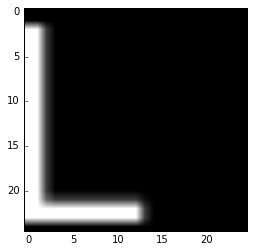

In [146]:
plt.imshow(letters[0], cmap='gray')

In [147]:
filepath = '../img/optimized/imagem1.jpeg'
img = Image.open(filepath) # open colour image
data = np.array(ImageOps.invert(img.convert('L')), dtype=np.float32)
data /= data.max()

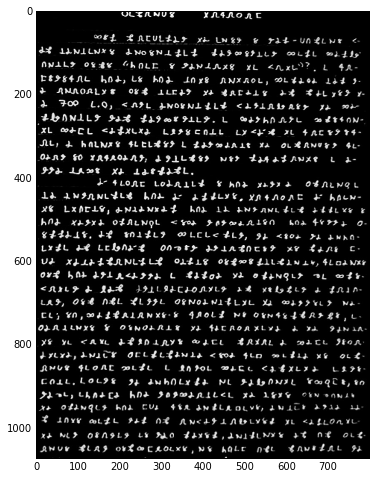

In [148]:
plt.figure(figsize=(8,8))
plt.imshow(data, cmap='gray')

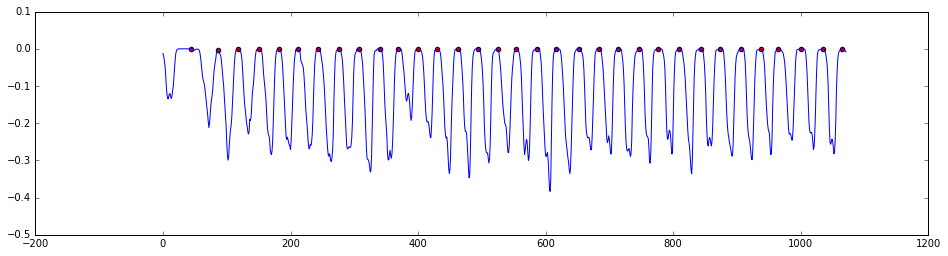

In [352]:
# find beginning and end of lines
avg_black_per_row = -1*np.mean(data, axis=1)
peaks_row = peakutils.indexes(avg_black_per_row, thres=0.9, min_dist=10)
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(avg_black_per_row)
ax.scatter(peaks_row, avg_black_per_row[peaks_row], c='red')

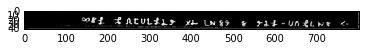

In [360]:
# confirm that line looks correct
plt.imshow(data[peaks_row[0]:peaks_row[1], :], cmap='gray', interpolation='none')

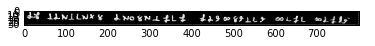

In [361]:
plt.imshow(data[peaks_row[1]:peaks_row[2]], cmap='gray', interpolation='none')

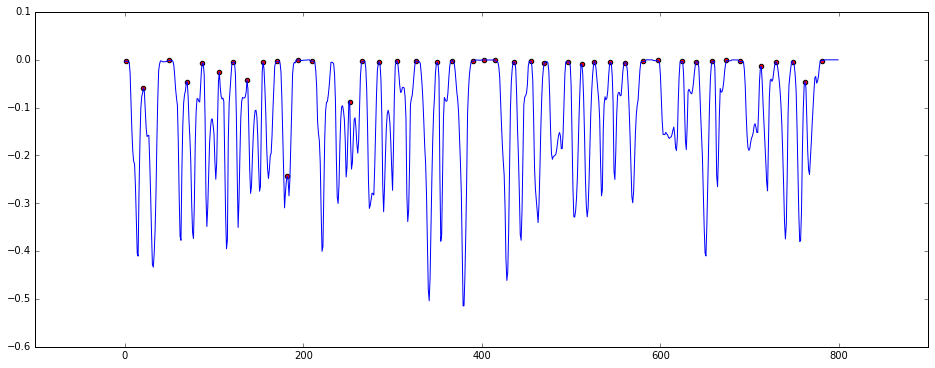

In [364]:
# find beginning and end of words given each line
for i in range(1, 2):
    line = data[peaks_row[i]:peaks_row[i+1]]
    avg_black_per_col = -1*np.mean(line.T, axis=1)
    #peaks_col = find_peaks_cwt(avg_black_per_col, np.arange(1, 25))
    peaks_col = peakutils.indexes(avg_black_per_col, min_dist=10)
    fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    ax.plot(avg_black_per_col)
    ax.scatter(peaks_col, avg_black_per_col[peaks_col], c='red')

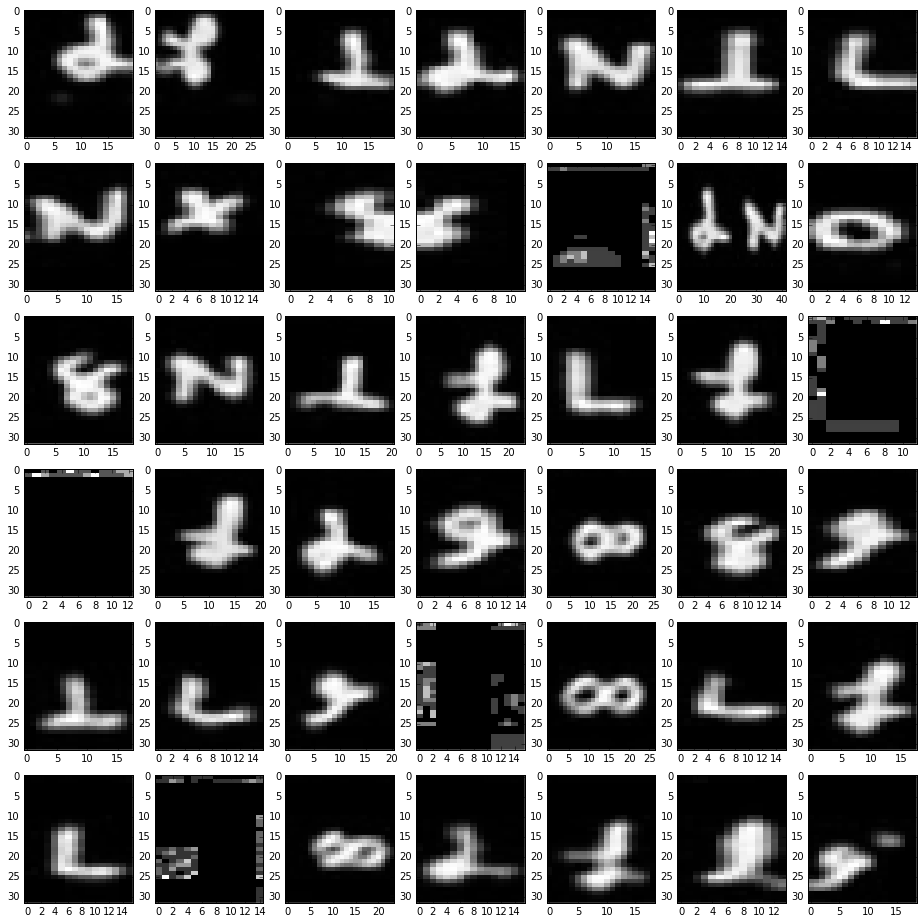

In [366]:
fig, axes = plt.subplots(6, 7, figsize=(16,16))
axes = axes.flatten()
for i in range(len(peaks_col)-1):
    axes[i].imshow(line[:, peaks_col[i]:peaks_col[i+1]], aspect='auto', interpolation='None', cmap='gray')

In [289]:
"""
mse = lambda x, y: np.mean((x-y)**2)
step_size = 25
transcription = []
for i in range(1, len(peaks_row)-1):
    offset = peaks_row[i+1] - peaks_row[i] - 25
    for j in range(0, data.shape[1]-step_size, step_size):
        dists = [mse(data[peaks_row[i]:peaks_row[i+1]-offset, j:j+step_size], letter) for letter in letters]
        transcription.append(alphabet[np.argmin(dists)])
transcription = np.array(transcription)
text = [transcription[i] for i in range(1, len(transcription)) 
        if transcription[i] != transcription[i-1]]
"""